# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.056866e+01     8.616556e+00
 * time: 0.0012919902801513672
     1     2.844926e+01     4.971609e+00
 * time: 0.005061149597167969
     2     1.931082e+01     4.879273e+00
 * time: 0.00985407829284668
     3     1.386113e+01     3.198730e+00
 * time: 0.014687061309814453
     4     1.291196e+01     5.029439e+00
 * time: 0.018397092819213867
     5     1.226399e+01     5.002124e+00
 * time: 0.021808147430419922
     6     1.054709e+01     3.156378e+00
 * time: 0.025043964385986328
     7     9.206179e+00     1.672218e+00
 * time: 0.02889108657836914
     8     8.703583e+00     8.313901e-01
 * time: 0.0332491397857666
     9     8.629790e+00     1.799203e+00
 * time: 0.036028146743774414
    10     8.509596e+00     1.033868e+00
 * time: 0.0401921272277832
    11     8.421792e+00     1.014597e+00
 * time: 0.04443502426147461
    12     8.340840e+00     9.044810e-01
 * time: 0.04880094528198242
    13     8.255788e+00     7.305144e-01
 *

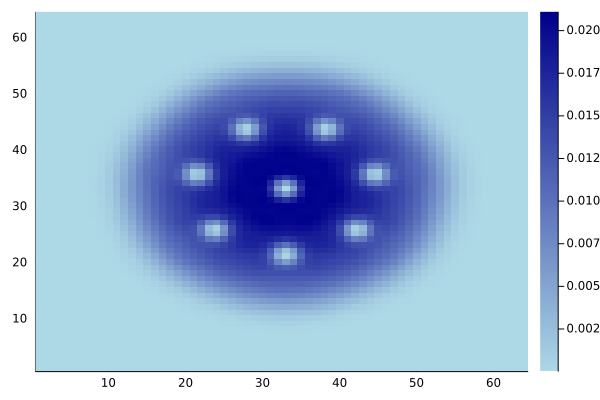

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)